#                                 Netflix Recommendation System

# NETFLIX MOVIE DATA

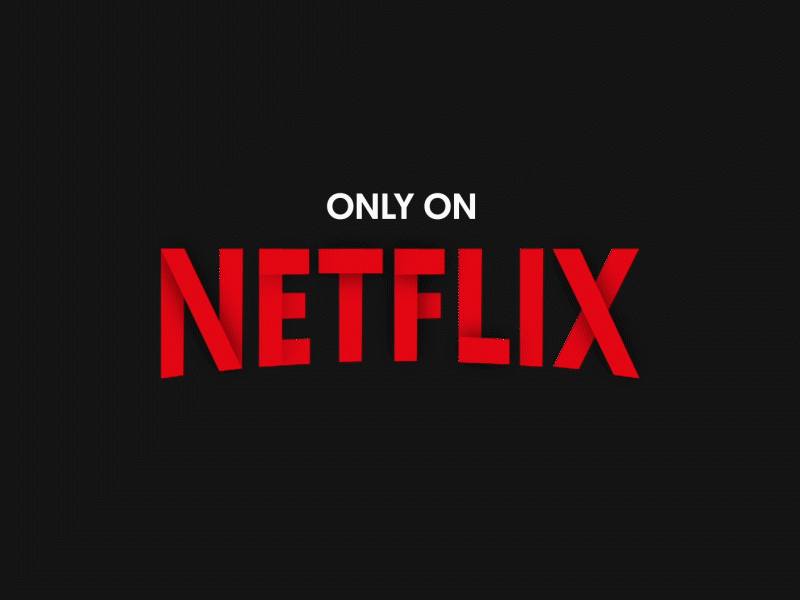

# Netflix beginning

### Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. Netflix's initial business model included DVD sales and rental by mail, but Hastings abandoned the sales about a year after the company's founding to focus on the initial DVD rental business .

# IMPORT LIBRARIES

In [1]:
import os 
import pandas as pd
import numpy as np
import datetime
import numpy as np
import pandas as pd
from numpy import dot
import seaborn as sns
from numpy import random
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors   
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import missingno as msno
import unidecode
import plotly.express as px

In [2]:
import re

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# LOAD THE DATASET

In [4]:
data = pd.read_csv('netflix_titles.csv')

# NUMBER OF ROWS AND COLUMNS

In [5]:
data.shape

(8807, 12)

# FIRST FIVE ROWS OF DATA

In [6]:
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [7]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

# CHECKING DTYPES

In [8]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
data.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

#### All type of elements of the data is object except release year, one of the main thing is there are 2 types (movie and TV shows) and 14 Rating of shows or movies.

# MISSING VALUES

In [10]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
data.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [12]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
total =data.isnull().sum().sort_values(ascending=False)
total

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
description        0
listed_in          0
release_year       0
title              0
type               0
show_id            0
dtype: int64

In [14]:
percent=(data.isnull().mean()*100).sort_values(ascending=False)
percent

director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
description      0.000000
listed_in        0.000000
release_year     0.000000
title            0.000000
type             0.000000
show_id          0.000000
dtype: float64

In [15]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [16]:
missing_data

Total    Percent
director       2634  29.908028
country         831   9.435676
cast            825   9.367549
date_added       10   0.113546
rating            4   0.045418
duration          3   0.034064
description       0   0.000000
listed_in         0   0.000000
release_year      0   0.000000
title             0   0.000000
type              0   0.000000
show_id           0   0.000000

In [17]:
missing_data=missing_data.drop((missing_data[missing_data['Total']==0]).index,0) 

In [18]:
missing_data

Total    Percent
director     2634  29.908028
country       831   9.435676
cast          825   9.367549
date_added     10   0.113546
rating          4   0.045418
duration        3   0.034064

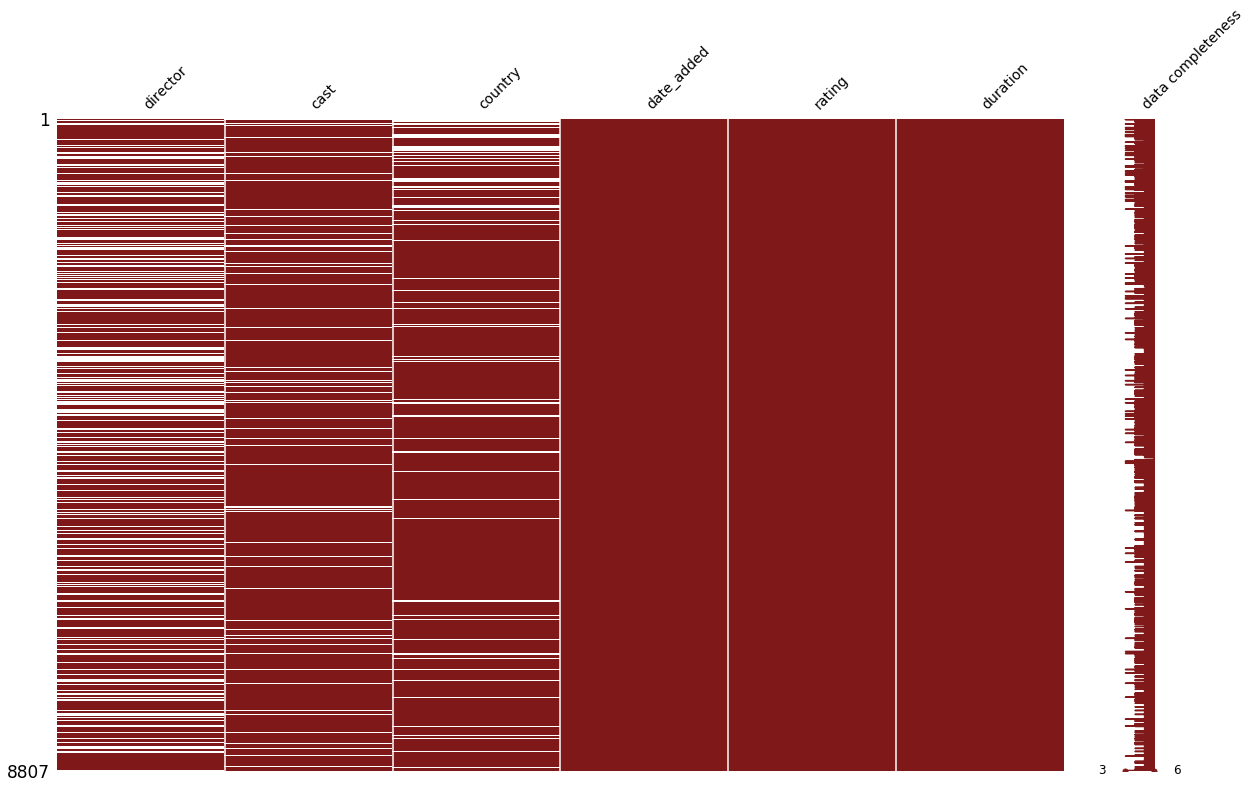

In [19]:
null_cols =(data.isna().sum()[data.isna().sum()>0]).index
msno.matrix(data.loc[:,null_cols],labels=True,figsize=(20,12),fontsize=14,inline=False ,color=(0.5,0.1,0.1))
plt.show()

## That's a big number, 30% of directors are missing and 9% of cast and country 9%

# Check for duplicate rows

In [20]:
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

There are 0 duplicate rows in the data set.


## There are no duplicates in the dataset 

# Removing the missing values from dataset

In [21]:
data.dropna(subset=['director','cast','country','date_added','rating','duration'],axis=0,inplace=True)
print("Details after dropping null rows and columns")
print("Total Rows: {}\nTotal Columns: {}".format(data.shape[0],data.shape[1]))

Details after dropping null rows and columns
Total Rows: 5332
Total Columns: 12


In [22]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Now there are no missing values in the dataset

Text(0,0.5,'Count Of Content')

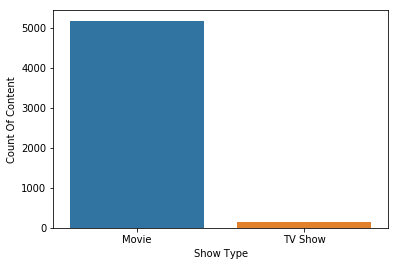

In [23]:
sns.countplot(x = 'type', data = data)
plt.xlabel("Show Type")
plt.ylabel("Count Of Content")

# A majority of the added content on netflix seem to be movies

In [24]:
def barplot(column,df):
    bar_plot1 = sns.countplot(x=column, data=df)
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 30, percentage, ha="center")

Text(0.5,1,'TV Show ratings frequency')

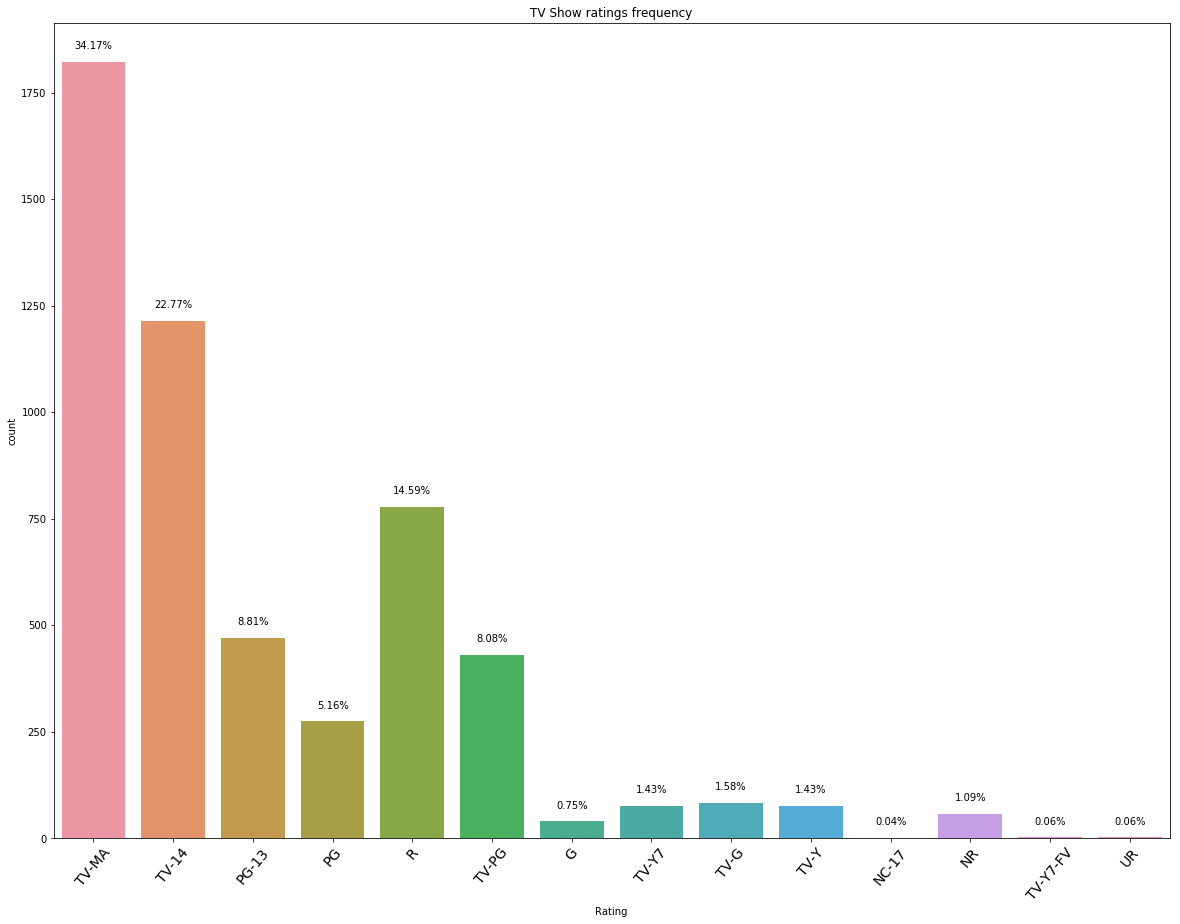

In [25]:
plt.figure(figsize=(20, 15))
plt.xticks(fontsize=14, rotation=50)
barplot("rating",data)
plt.xlabel("Rating")
plt.title("TV Show ratings frequency")

* TV-MA: Mature Audience
* PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under
* TV-PG: Parental Guidance suggested
* TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under
* TV-G: Suitable for GeneralM Audiences
* TV-Y: Designed to be appropriate for all children

### Netflix targets older/mature audience as there are several contents rated as "TV Mature Audience (TV-MA)"


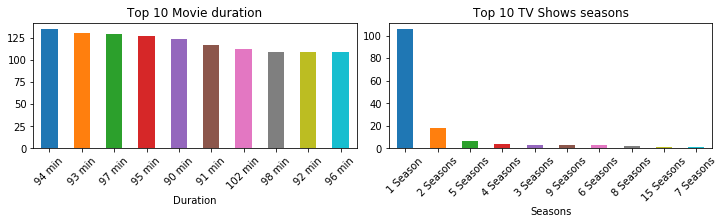

In [26]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
movies_duration = data[data['type'] == "Movie"]
movies_duration = movies_duration['duration'].value_counts()[:10]
movies_duration.plot(kind='bar',title='Number of movies over the years')
plt.xlabel("Duration")
plt.title("Top 10 Movie duration")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
show_duration = data[data['type'] == "TV Show"]
show_duration = show_duration['duration'].value_counts()[:10]
show_duration.plot(kind='bar',title='Number of TV shows over the years')
plt.xlabel("Seasons")
plt.title("Top 10 TV Shows seasons")
plt.xticks(rotation = 45)

plt.tight_layout(pad=0.3)

## The length of each movie is mostly above 1 and a half hour, whereas several TV Shows seems to be limited series of 1 season.

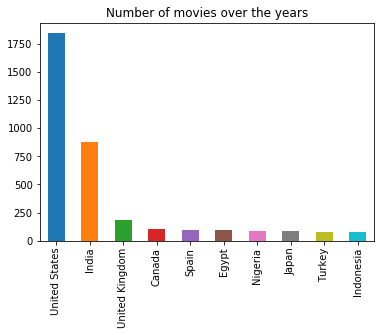

In [27]:
country = data['country'].value_counts()[:10]
country.plot(kind='bar',title='Number of movies over the years')

## The United States of America is the leading content contributor followed by India.

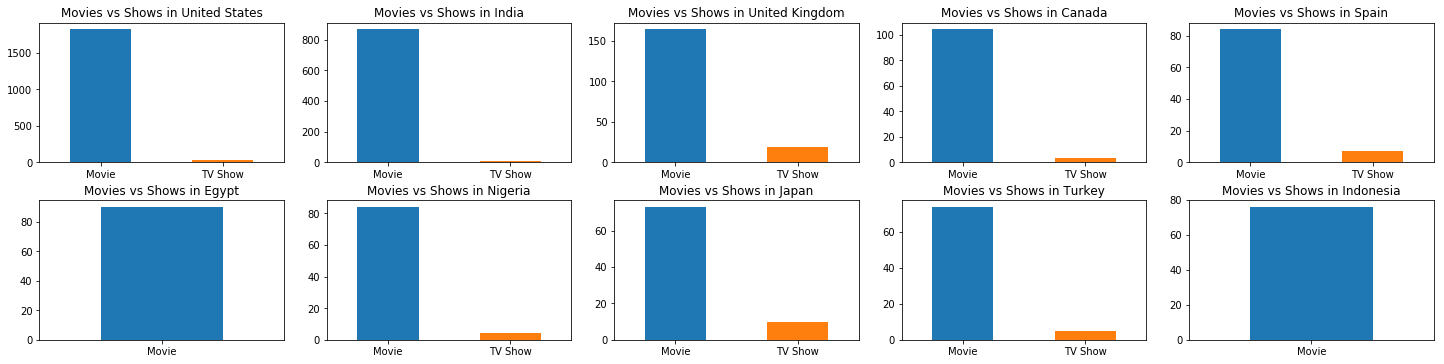

In [28]:
plt.figure(figsize=(20,5))

for i in range(len(country.index)):
    plt.subplot(2,5,i+1)
    moviesvsshows = data[data['country'] == country.index[i]]
    moviesvsshows = moviesvsshows['type'].value_counts()
    moviesvsshows.plot(kind='bar')
    plt.title("Movies vs Shows in {}".format(country.index[i]))
    plt.xticks(rotation = 360)
    
plt.tight_layout(pad=0.5)

## It seems that in most countries more movies are produced than series

### Diving deeper into contributions we see that Egypt, The Philippines, and Indonesia are majorly contributing several movies. Although The United States of America and India are the biggest content contributor, we observe United Kingdom, Spain, Japan, Turkey, and Canada offer more TV Shows.

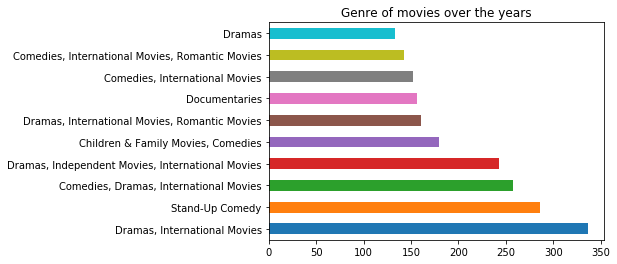

In [29]:
genre = data["listed_in"].value_counts()[:10]
genre.plot(kind='barh',title='Genre of movies over the years')

## Netflix offer a number of Stand-ups, Dramas and International Movies

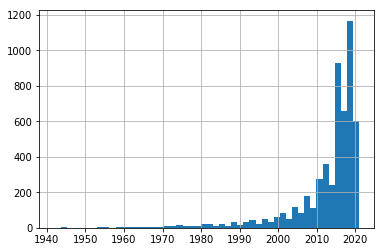

In [30]:
data["release_year"].hist(bins=50)

## Most movies tend to have been released not so long ago

## Let us now look at the directors

In [31]:
data["director"].value_counts()

Raúl Campos, Jan Suter               18
Marcus Raboy                         15
Jay Karas                            14
Cathy Garcia-Molina                  13
Martin Scorsese                      12
Jay Chapman                          12
Youssef Chahine                      12
Steven Spielberg                     11
Don Michael Paul                     10
David Dhawan                          9
Johnnie To                            8
Robert Rodriguez                      8
Ryan Polito                           8
Troy Miller                           8
Yılmaz Erdoğan                        8
Hakan Algül                           8
Shannon Hartman                       8
Clint Eastwood                        7
Justin G. Dyck                        7
McG                                   7
Quentin Tarantino                     7
Toshiya Shinohara                     7
Kunle Afolayan                        7
Ron Howard                            7
Lance Bangs                           7


### We see that in some cases there is more than one director. Let us get the number of directors in each movie

In [32]:
data["director_number"] = data["director"].str.split(',').str.len()
data["director_number"].describe()

count    5332.000000
mean        1.117779
std         0.549558
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        13.000000
Name: director_number, dtype: float64

## Seems that there were movies/series with many directors. Let us take a closer look:

In [33]:
data[["title"]][data["director_number"] > 5].size

11

## There are in fact 11 titles with more than five directors. Let us get the names of these directors:

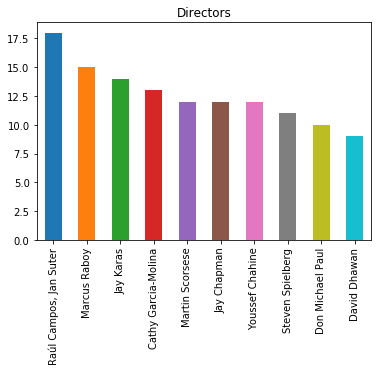

In [34]:
country = data['director'].value_counts()[:10]
country.plot(kind='bar',title='Directors')

## Let us look at date the movie or series was added:

In [35]:
data["date_added"].head()

7     September 24, 2021
8     September 24, 2021
9     September 24, 2021
12    September 23, 2021
24    September 21, 2021
Name: date_added, dtype: object

## It would make sense to convert the type to date:

In [36]:
data["date_added"] = pd.to_datetime(data["date_added"])

## We now plot:

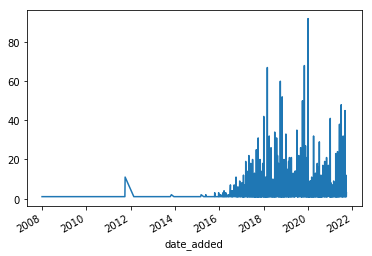

In [37]:
data.groupby("date_added").size().plot(kind="line")

## Most were added after 2016. Let us zoom in on that part of the graph:

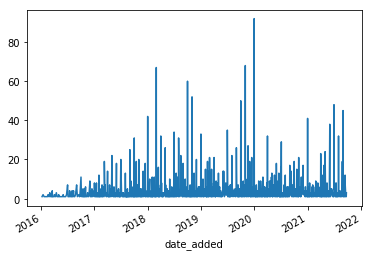

In [38]:
data[data["date_added"] > pd.Timestamp(2016, 1, 1)].groupby("date_added").size().plot(kind="line")

## We see that there is a peak around the year 2020.

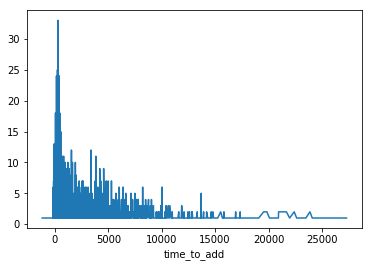

In [39]:
release_year = data["release_year"].apply(lambda x: pd.Timestamp(x, 7, 1))
# now get the difference between date added and date released for each movie
data["time_to_add"] = (data["date_added"] - release_year).dt.days
data.groupby("time_to_add").size().plot(kind="line")

## The vast majority are less than 5000 days old. Let us zoom in on that area:

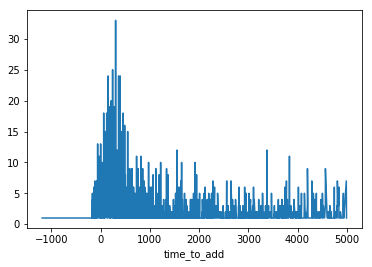

In [40]:
data[data["time_to_add"] < 5000].groupby("time_to_add").size().plot(kind="line")

## Many movies and series are less than one year old when they are released.

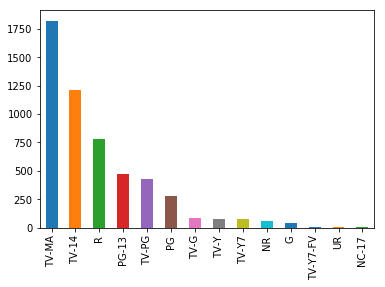

In [41]:
data["rating"].value_counts().plot(kind="bar")

# WordCloud for Genres.

In [42]:
from collections import Counter

genres=list(data['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

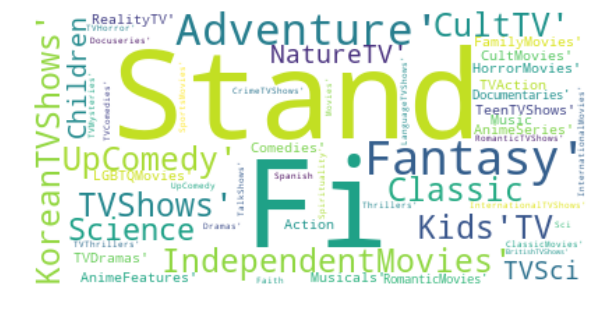

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (10,10)

#assigning shape to the word cloud

wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Words that are mostly used in the description of content 

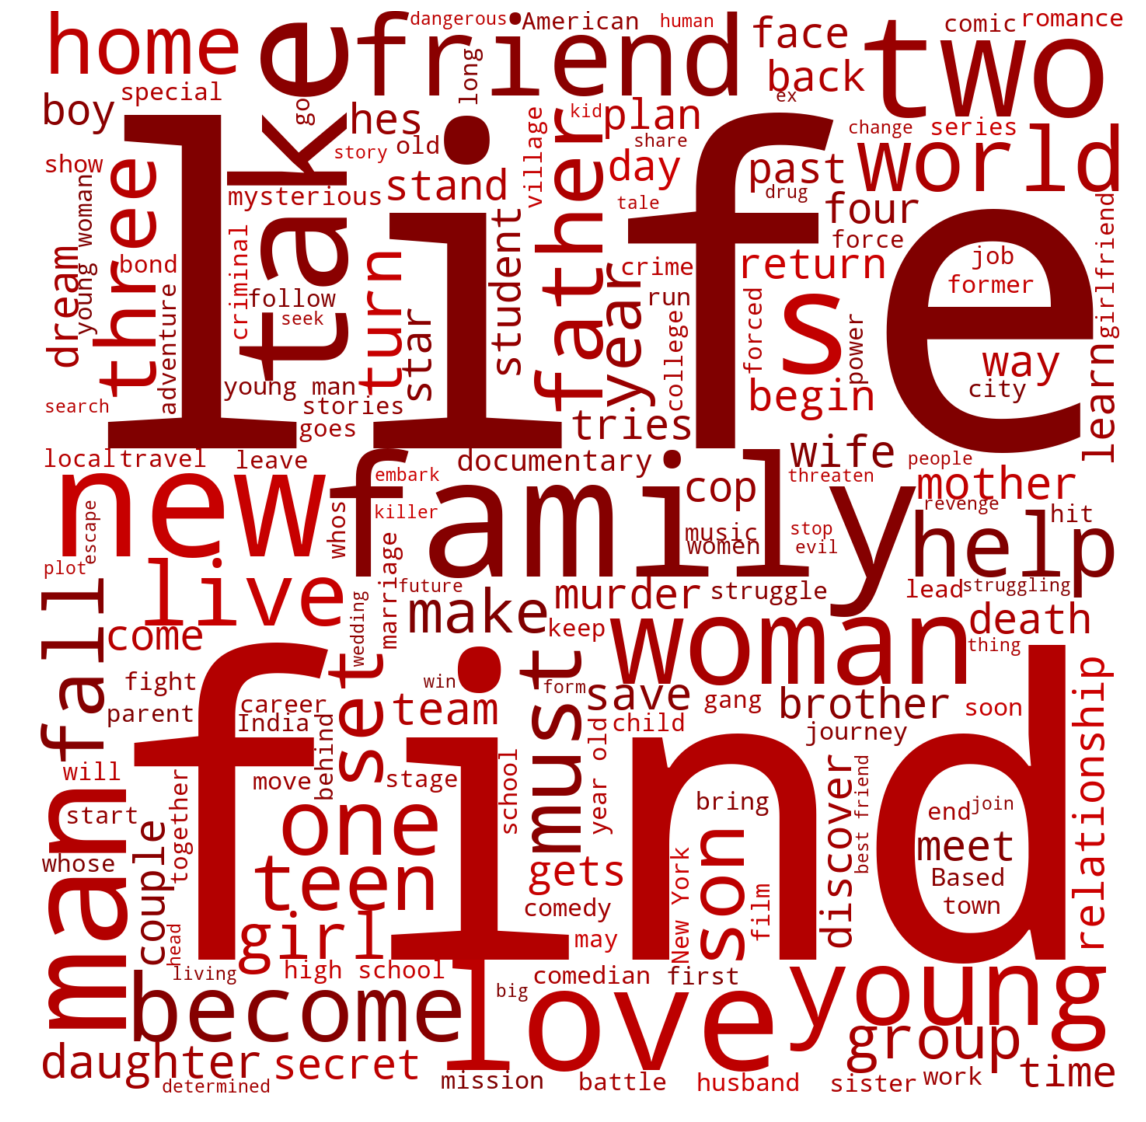

In [44]:
from wordcloud import WordCloud
from PIL import Image
import random
import matplotlib.pyplot as plt
import requests

text = str(list(data['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

def red_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return "hsl(0, 100%%, %f%%)" % random.randint(25, 40)

plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 1400, max_words = 170).generate(text)

wordcloud.recolor(color_func = red_color_func)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Summary of Analysis

### Analysis based on given data

## Developing Recommendation Engine using cast, director, country, rating and genres

In [45]:
movies = data[data['type'] == 'Movie'].reset_index()
movies = movies.drop(['index', 'show_id', 'type', 'date_added', 'release_year', 'duration', 'description'], axis=1)
movies.head()

title             director  \
0       Sankofa         Haile Gerima   
1  The Starling       Theodore Melfi   
2  Je Suis Karl  Christian Schwochow   
3         Jeans           S. Shankar   
4     Grown Ups         Dennis Dugan   

                                                cast  \
0  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
1  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
2  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
3  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
4  Adam Sandler, Kevin James, Chris Rock, David S...   

                                             country rating  \
0  United States, Ghana, Burkina Faso, United Kin...  TV-MA   
1                                      United States  PG-13   
2                            Germany, Czech Republic  TV-MA   
3                                              India  TV-14   
4                                      United States  PG-13   

                                          listed_in  director_number  \
0  Dramas, Independent Movies, International Movies                1   
1                                  Comedies, Dramas                1   
2                      Dramas, International Movies                1   
3   Comedies, International Movies, Romantic Movies                1   
4                                          Comedies                1   

   time_to_add  
0        10312  
1           85  
2           84  
3         8483  
4         4099

In [46]:
tv = data[data['type'] == 'TV Show'].reset_index()
tv = tv.drop(['index', 'show_id', 'type', 'date_added', 'release_year', 'duration', 'description'], axis=1)
tv.head()

title  \
0         The Great British Baking Show   
1  King of Boys: The Return of the King   
2                         Gone for Good   
3                               Valeria   
4                              Navarasa   

                                            director  \
0                                    Andy Devonshire   
1                                       Kemi Adetiba   
2                                 Juan Carlos Medina   
3                                      Inma Torrente   
4  Bejoy Nambiar, Priyadarshan, Karthik Narain, V...   

                                                cast         country rating  \
0  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom  TV-14   
1  Sola Sobowale, Toni Tones, Richard Mofe-Damijo...         Nigeria  TV-MA   
2  Finnegan Oldfield, Nicolas Duvauchelle, Guilla...          France  TV-MA   
3  Diana Gómez, Silma López, Paula Malia, Teresa ...           Spain  TV-MA   
4  Suriya, Vijay Sethupathi, Revathy, Prakash Raj...           India  TV-MA   

                                           listed_in  director_number  \
0                       British TV Shows, Reality TV                1   
1  Crime TV Shows, International TV Shows, TV Dramas                1   
2  Crime TV Shows, International TV Shows, TV Dramas                1   
3  International TV Shows, Romantic TV Shows, Spa...                1   
4                                           TV Shows                9   

   time_to_add  
0           85  
1           57  
2           43  
3           43  
4           36

In [47]:
actors = []

for i in data['cast']:
    actor = re.split(r', \s*', i)
    actors.append(actor)
    
flat_list = []
for sublist in actors:
    for item in sublist:
        flat_list.append(item)
        
actors_list = sorted(set(flat_list))

binary_actors = [[0] * 0 for i in range(len(set(flat_list)))]

for i in data['cast']:
    k = 0
    for j in actors_list:
        if j in i:
            binary_actors[k].append(1.0)
        else:
            binary_actors[k].append(0.0)
        k+=1
        
binary_actors = pd.DataFrame(binary_actors).transpose()
        
directors = []

for i in data['director']:
    if pd.notna(i):
        director = re.split(r', \s*', i)
        directors.append(director)
    
flat_list2 = []
for sublist in directors:
    for item in sublist:
        flat_list2.append(item)
        
directors_list = sorted(set(flat_list2))

binary_directors = [[0] * 0 for i in range(len(set(flat_list2)))]

for i in data['director']:
    k = 0
    for j in directors_list:
        if pd.isna(i):
            binary_directors[k].append(0.0)
        elif j in i:
            binary_directors[k].append(1.0)
        else:
            binary_directors[k].append(0.0)
        k+=1
        
binary_directors = pd.DataFrame(binary_directors).transpose()
        
countries = []

for i in data['country']:
    country = re.split(r', \s*', i)
    countries.append(country)
    
flat_list3 = []
for sublist in countries:
    for item in sublist:
        flat_list3.append(item)
        
countries_list = sorted(set(flat_list3))

binary_countries = [[0] * 0 for i in range(len(set(flat_list3)))]

for i in data['country']:
    k = 0
    for j in countries_list:
        if j in i:
            binary_countries[k].append(1.0)
        else:
            binary_countries[k].append(0.0)
        k+=1
        
binary_countries = pd.DataFrame(binary_countries).transpose()

genres = []

for i in data['listed_in']:
    genre = re.split(r', \s*', i)
    genres.append(genre)
    
flat_list4 = []
for sublist in genres:
    for item in sublist:
        flat_list4.append(item)
        
genres_list = sorted(set(flat_list4))

binary_genres = [[0] * 0 for i in range(len(set(flat_list4)))]

for i in data['listed_in']:
    k = 0
    for j in genres_list:
        if j in i:
            binary_genres[k].append(1.0)
        else:
            binary_genres[k].append(0.0)
        k+=1
        
binary_genres = pd.DataFrame(binary_genres).transpose()

ratings = []

for i in data['rating']:
    ratings.append(i)

ratings_list = sorted(set(ratings))

binary_ratings = [[0] * 0 for i in range(len(set(ratings_list)))]

for i in data['rating']:
    k = 0
    for j in ratings_list:
        if j in i:
            binary_ratings[k].append(1.0)
        else:
            binary_ratings[k].append(0.0)
        k+=1
        
binary_ratings = pd.DataFrame(binary_ratings).transpose()

In [48]:
binary = pd.concat([binary_actors, binary_directors, binary_countries, binary_genres], axis=1,ignore_index=True)
binary

0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
14      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
15      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
20      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
21      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
22      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
23      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
24      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
27      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
29      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5302    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5303    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5304    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5305    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5306    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5307    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5308    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5309    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5310    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5311    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5312    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5313    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5314    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5315    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5316    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5317    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5318    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5319    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5320    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5321    0.0    0.0    0.0   

In [49]:
actors2 = []

for i in tv['cast']:
    actor2 = re.split(r', \s*', i)
    actors2.append(actor2)
    
flat_list5 = []
for sublist in actors2:
    for item in sublist:
        flat_list5.append(item)
        
actors_list2 = sorted(set(flat_list5))

binary_actors2 = [[0] * 0 for i in range(len(set(flat_list5)))]

for i in tv['cast']:
    k = 0
    for j in actors_list2:
        if j in i:
            binary_actors2[k].append(1.0)
        else:
            binary_actors2[k].append(0.0)
        k+=1
        
binary_actors2 = pd.DataFrame(binary_actors2).transpose()
        

countries2 = []

for i in tv['country']:
    country2 = re.split(r', \s*', i)
    countries2.append(country2)
    
flat_list6 = []
for sublist in countries2:
    for item in sublist:
        flat_list6.append(item)
        
countries_list2 = sorted(set(flat_list6))

binary_countries2 = [[0] * 0 for i in range(len(set(flat_list6)))]

for i in tv['country']:
    k = 0
    for j in countries_list2:
        if j in i:
            binary_countries2[k].append(1.0)
        else:
            binary_countries2[k].append(0.0)
        k+=1
        
binary_countries2 = pd.DataFrame(binary_countries2).transpose()

genres2 = []

for i in tv['listed_in']:
    genre2 = re.split(r', \s*', i)
    genres2.append(genre2)
    
flat_list7 = []
for sublist in genres2:
    for item in sublist:
        flat_list7.append(item)
        
genres_list2 = sorted(set(flat_list7))

binary_genres2 = [[0] * 0 for i in range(len(set(flat_list7)))]

for i in tv['listed_in']:
    k = 0
    for j in genres_list2:
        if j in i:
            binary_genres2[k].append(1.0)
        else:
            binary_genres2[k].append(0.0)
        k+=1
        
binary_genres2 = pd.DataFrame(binary_genres2).transpose()

ratings2 = []

for i in tv['rating']:
    ratings2.append(i)

ratings_list2 = sorted(set(ratings2))

binary_ratings2 = [[0] * 0 for i in range(len(set(ratings_list2)))]

for i in tv['rating']:
    k = 0
    for j in ratings_list2:
        if j in i:
            binary_ratings2[k].append(1.0)
        else:
            binary_ratings2[k].append(0.0)
        k+=1
        
binary_ratings2 = pd.DataFrame(binary_ratings2).transpose()

In [50]:
binary2 = pd.concat([binary_actors2, binary_countries2, binary_genres2], axis=1, ignore_index=True)
binary2

0     1     2     3     4     5     6     7     8     9     ...   1370  \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
5     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
6     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
7     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
8     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
9     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
10    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
11    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
12    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
13    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
14    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
15    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
16    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
17    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
18    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
19    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    1.0   
20    0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
21    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
22    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
23    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
24    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
25    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
26    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
27    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    1.0   
28    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
29    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
117   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
118   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
119   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
120   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    1.0   
121   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
123   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
124   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
125   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
126   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
127   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
128   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
129   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
130   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
131   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
132   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
133   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
134   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
135   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0

In [51]:
def recommender(search):
    cs_list = []
    binary_list = []
    if search in movies['title'].values:
        idx = movies[movies['title'] == search].index.item()
        for i in binary.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]    
        for j in range(len(movies)):
            binary_list2 = []
            for k in binary.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        movies_copy = movies.copy()
        movies_copy['cos_sim'] = cs_list
        results = movies_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    elif search in tv['title'].values:
        idx = tv[tv['title'] == search].index.item()
        for i in binary2.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]
        for j in range(len(tv)):
            binary_list2 = []
            for k in binary2.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        tv_copy = tv.copy()
        tv_copy['cos_sim'] = cs_list
        results = tv_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    else:
        return("Title not in dataset. Please check spelling.")

In [52]:
recommender('The Conjuring')

title                         director  \
2240  Angela's Christmas                  Damien O’Connor   
1919            Rakkhosh  Abhijit Kokate, Srivinay Salian   
3032   Asperger's Are Us                     Alex Lehmann   
3286           Abhinetri                      A. L. Vijay   
3109            Tallulah                       Sian Heder   

                                                   cast          country  \
2240  Lucy O'Connell, Ruth Negga, Brendan Mullins, M...  Ireland, Canada   
1919  Sanjay Mishra, Priyanka Bose, Tannishtha Chatt...            India   
3032  Noah Britton, Ethan Finlan, Jack Hanke, New Mi...    United States   
3286  Tamannaah Bhatia, Prabhu Deva, Sonu Sood, Sapt...            India   
3109  Ellen Page, Allison Janney, Tammy Blanchard, E...    United States   

     rating                                          listed_in  \
2240   TV-Y                           Children & Family Movies   
1919  TV-MA  Horror Movies, Independent Movies, Internation...   
3032  TV-MA                                      Documentaries   
3286  TV-14   Comedies, International Movies, Sci-Fi & Fantasy   
3109  TV-MA                         Dramas, Independent Movies   

      director_number  time_to_add   cos_sim  
2240                1          152  0.430331  
1919                2          -11  0.421637  
3032                1          163  0.346410  
3286                1          669  0.346410  
3109                1           28  0.346410

In [53]:
recommender("Child's Play")

title        director  \
2014     Alien Warfare  Jeremiah Jones   
4196            Man Up      Ben Palmer   
2338           Apostle    Gareth Evans   
3367  Arthur Christmas     Sarah Smith   
2964        100 Meters  Marcel Barrena   

                                                   cast  \
2014  Clayton Snyder, David Meadows, Daniel Washingt...   
4196  Lake Bell, Simon Pegg, Ophelia Lovibond, Olivi...   
2338  Dan Stevens, Lucy Boynton, Michael Sheen, Mark...   
3367  James McAvoy, Hugh Laurie, Bill Nighy, Jim Bro...   
2964  Dani Rovira, Karra Elejalde, Alexandra Jiménez...   

                            country rating  \
2014                  United States  TV-MA   
4196         United Kingdom, France      R   
2338  United Kingdom, United States  TV-MA   
3367  United Kingdom, United States     PG   
2964                Portugal, Spain  TV-MA   

                                            listed_in  director_number  \
2014             Action & Adventure, Sci-Fi & Fantasy                1   
4196  Comedies, International Movies, Romantic Movies                1   
2338   Horror Movies, International Movies, Thrillers                1   
3367               Children & Family Movies, Comedies                1   
2964      Dramas, International Movies, Sports Movies                1   

      time_to_add   cos_sim  
2014          -87  0.514496  
4196         1161  0.460179  
2338          103  0.460179  
3367         3106  0.460179  
2964          252  0.438763

In [54]:
recommender('Charlie and the Chocolate Factory')

title                    director  \
3889         Haseena Maan Jaayegi                David Dhawan   
3564  Chhota Bheem Kungfu Dhamaka  Rajiv Chilaka, Binayak Das   
4850           The Gospel of Luke                 David Batty   
2349             The Black Prince                    Kavi Raz   
3355              Another Forever                 Juan Zapata   

                                                   cast  \
3889  Sanjay Dutt, Govinda, Karisma Kapoor, Pooja Ba...   
3564  Sonal Kaushal, Rupa Bhimani, Jigna Bharadhwaj,...   
4850  Selva Rasalingam, Karima Gouit, Mourad Zaoui, ...   
2349  Satinder Sartaaj, Shabana Azmi, Jason Flemyng,...   
3355  Daniela Escobar, Marlon Moreno, Peter Ketnath,...   

                                                country rating  \
3889                                              India  TV-PG   
3564                                              India  TV-Y7   
4850             United States, United Kingdom, Morocco  TV-14   
2349               United Kingdom, India, United States  PG-13   
3355  Brazil, Netherlands, United States, Colombia, ...  TV-PG   

                                             listed_in  director_number  \
3889              Action & Adventure, Comedies, Dramas                1   
3564                          Children & Family Movies                2   
4850                      Dramas, Faith & Spirituality                1   
2349                      Dramas, International Movies                1   
3355  Dramas, Independent Movies, International Movies                1   

      time_to_add   cos_sim  
3889         6818  0.666667  
3564           45  0.547723  
4850         1206  0.547723  
2349          459  0.547723  
3355          263  0.547723

In [55]:
recommender('Wild Child')

title                            director  \
2756    Patton Oswalt: Annihilation                   Bobcat Goldthwait   
692                     Good Burger                       Brian Robbins   
3492                          Bokeh  Geoffrey Orthwein, Andrew Sullivan   
3671  Disciples Of The 36th Chamber                      Chia-Liang Liu   
3665     Di Renjie zhi Sidatianwang                           Hark Tsui   

                                                   cast  \
2756                                      Patton Oswalt   
692   Kenan Thompson, Kel Mitchell, Abe Vigoda, Dan ...   
3492  Maika Monroe, Matt O'Leary, Arnar Jónsson, Gun...   
3671  Hou Hsiao, Gordon Liu, Lily Li, Jason Pai Piao...   
3665  Mark Chao, Feng Shaofeng, Kenny Lin, Carina La...   

                     country rating  \
2756           United States  TV-MA   
692            United States     PG   
3492  United States, Iceland  TV-14   
3671               Hong Kong  TV-14   
3665        China, Hong Kong  TV-14   

                                              listed_in  director_number  \
2756                                    Stand-Up Comedy                1   
692                  Children & Family Movies, Comedies                1   
3492       Dramas, Independent Movies, Sci-Fi & Fantasy                2   
3671           Action & Adventure, International Movies                1   
3665  Action & Adventure, International Movies, Sci-...                1   

      time_to_add   cos_sim  
2756          108  0.533002  
692          8585  0.476731  
3492           -9  0.454545  
3671        12099  0.426401  
3665          220  0.426401

In [56]:
recommender("Dr. Seuss' The Cat in the Hat")

title                           director  \
2852                 Lal Patthar                    Sushil Majumdar   
497                 Just Say Yes  Appie Boudellah, Aram van de Rest   
3634                 Dark Crimes                 Alexandros Avranas   
3665  Di Renjie zhi Sidatianwang                          Hark Tsui   
3664                     Dhamaal                        Indra Kumar   

                                                   cast  \
2852  Raaj Kumar, Hema Malini, Rakhee Gulzar, Vinod ...   
497   Yolanthe Cabau, Noortje Herlaar, Kim-Lian van ...   
3634  Jim Carrey, Marton Csokas, Charlotte Gainsbour...   
3665  Mark Chao, Feng Shaofeng, Kenny Lin, Carina La...   
3664  Sanjay Dutt, Riteish Deshmukh, Arshad Warsi, A...   

                                    country rating  \
2852                                  India  TV-14   
497                             Netherlands  TV-MA   
3634  United Kingdom, Poland, United States      R   
3665                       China, Hong Kong  TV-14   
3664                                  India  TV-14   

                                              listed_in  director_number  \
2852       Classic Movies, Dramas, International Movies                1   
497     Comedies, International Movies, Romantic Movies                2   
3634                                  Dramas, Thrillers                1   
3665  Action & Adventure, International Movies, Sci-...                1   
3664  Action & Adventure, Comedies, International Mo...                1   

      time_to_add   cos_sim  
2852        16802  0.445435  
497           -90  0.402911  
3634         1201  0.385758  
3665          220  0.377964  
3664         4566  0.377964

In [57]:
recommender('Hook')

title                   director  \
16   Let's Fight Ghost          Kongkiat Khomsiri   
57     Fary : Hexagone  Adrien Lagier, Ousmane Ly   
5         Office Girls                Hsu Fu-chun   
30           Before 30                  BB Sasore   
133   Leyla and Mecnun                  Onur Ünlü   

                                                  cast   country rating  \
16   Suppapong Udomkaewkanjana, Patchanan Jiajirach...  Thailand  TV-14   
57                                                Fary    France  TV-MA   
5    Roy Chiu, Alice Ko, Tia Lee, Patrick Lee, Kuo ...    Taiwan  TV-14   
30   Damilola Adegbite, O.C. Ukeje, Beverly Naya, M...   Nigeria  TV-MA   
133  Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...    Turkey  TV-MA   

                                             listed_in  director_number  \
16   International TV Shows, Romantic TV Shows, TV ...                1   
57   International TV Shows, Stand-Up Comedy & Talk...                2   
5    International TV Shows, Romantic TV Shows, TV ...                1   
30   International TV Shows, Romantic TV Shows, TV ...                1   
133  International TV Shows, Romantic TV Shows, TV ...                1   

     time_to_add   cos_sim  
16           -69  0.340207  
57           -76  0.288675  
5           3686  0.272166  
30          1973  0.261488  
133         1019  0.251976

In [58]:
recommender('Holidate')

title        director  \
4648          Solo Con Tu Pareja  Alfonso Cuarón   
1354                   R.K.Nagar  Saravana Rajan   
4928              The Peacemaker      Mimi Leder   
1441          Muqaddar ka Faisla   Prakash Mehra   
3886  Harriet the Spy: Blog Wars      Ron Oliver   

                                                   cast  \
4648  Luis de Icaza, Dobrina Liubomirova, Isabel Ben...   
1354  Vaibhav Reddy, Sana Althaf, Sampath Raj, Inigo...   
4928  George Clooney, Nicole Kidman, Marcel Iures, A...   
1441  Raaj Kumar, Rakhee Gulzar, Raj Babbar, Tina Mu...   
3886  Jennifer Stone, Kristin Booth, Wesley Morgan, ...   

                    country rating  \
4648                 Mexico     NR   
1354                  India  TV-14   
4928          United States      R   
1441                  India  TV-14   
3886  United States, Canada   TV-G   

                                              listed_in  director_number  \
4648  Comedies, Independent Movies, International Mo...                1   
1354               Action & Adventure, Comedies, Dramas                1   
4928                                 Action & Adventure                1   
1441               Action & Adventure, Comedies, Dramas                1   
3886                 Children & Family Movies, Comedies                1   

      time_to_add   cos_sim  
4648         9924  0.372678  
1354          303  0.372104  
4928         8219  0.368932  
1441        11963  0.358569  
3886         2845  0.353553

# Recommending TV shows

In [59]:
recommender('Halston')

title                              director  \
140   Royal Pains                     Jay Chandrasekhar   
128   Jack Taylor                           Stuart Orme   
136          Mars                         Everardo Gout   
81   Sacred Games  Vikramaditya Motwane, Anurag Kashyap   
69            You                    Lee Toland Krieger   

                                                  cast  \
140  Mark Feuerstein, Paulo Costanzo, Reshma Shetty...   
128  Iain Glen, Killian Scott, Nora-Jane Noone, Tar...   
136  Jihae, Alberto Ammann, Clémentine Poidatz, Ana...   
81   Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...   
69   Penn Badgley, Elizabeth Lail, Shay Mitchell, J...   

                    country rating  \
140           United States  TV-PG   
128  United States, Ireland  TV-MA   
136           United States  TV-PG   
81     India, United States  TV-MA   
69            United States  TV-MA   

                                             listed_in  director_number  \
140                             TV Comedies, TV Dramas                1   
128  Crime TV Shows, International TV Shows, TV Dramas                1   
136         Docuseries, Science & Nature TV, TV Dramas                1   
81   Crime TV Shows, International TV Shows, TV Dramas                2   
69        Crime TV Shows, Romantic TV Shows, TV Dramas                1   

     time_to_add   cos_sim  
140          321  0.158114  
128        -1188  0.150756  
136          488  0.150756  
81            45  0.150756  
69           178  0.150756

In [60]:
recommender('Riverdale')

title                              director  \
81       Sacred Games  Vikramaditya Motwane, Anurag Kashyap   
69                You                    Lee Toland Krieger   
128       Jack Taylor                           Stuart Orme   
122  Brave Miss World                          Cecilia Peck   
2       Gone for Good                    Juan Carlos Medina   

                                                  cast  \
81   Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...   
69   Penn Badgley, Elizabeth Lail, Shay Mitchell, J...   
128  Iain Glen, Killian Scott, Nora-Jane Noone, Tar...   
122                                      Linor Abargil   
2    Finnegan Oldfield, Nicolas Duvauchelle, Guilla...   

                                        country rating  \
81                         India, United States  TV-MA   
69                                United States  TV-MA   
128                      United States, Ireland  TV-MA   
122  United States, Israel, Italy, South Africa  TV-14   
2                                        France  TV-MA   

                                             listed_in  director_number  \
81   Crime TV Shows, International TV Shows, TV Dramas                2   
69        Crime TV Shows, Romantic TV Shows, TV Dramas                1   
128  Crime TV Shows, International TV Shows, TV Dramas                1   
122                         Crime TV Shows, Docuseries                1   
2    Crime TV Shows, International TV Shows, TV Dramas                1   

     time_to_add   cos_sim  
81            45  0.227921  
69           178  0.227921  
128        -1188  0.227921  
122         1692  0.200446  
2             43  0.179284

In [61]:
recommender('Gone for Good')

title                              director  \
49              Inhuman Resources                          Ziad Doueiri   
57                Fary : Hexagone             Adrien Lagier, Ousmane Ly   
128                   Jack Taylor                           Stuart Orme   
68   Jamtara - Sabka Number Ayega                       Soumendra Padhi   
81                   Sacred Games  Vikramaditya Motwane, Anurag Kashyap   

                                                  cast  \
49   Eric Cantona, Suzanne Clément, Alex Lutz, Gust...   
57                                                Fary   
128  Iain Glen, Killian Scott, Nora-Jane Noone, Tar...   
68   Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...   
81   Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...   

                    country rating  \
49                   France  TV-MA   
57                   France  TV-MA   
128  United States, Ireland  TV-MA   
68                    India  TV-MA   
81     India, United States  TV-MA   

                                             listed_in  director_number  \
49   Crime TV Shows, International TV Shows, TV Dramas                1   
57   International TV Shows, Stand-Up Comedy & Talk...                2   
128  Crime TV Shows, International TV Shows, TV Dramas                1   
68   Crime TV Shows, International TV Shows, TV Dramas                1   
81   Crime TV Shows, International TV Shows, TV Dramas                2   

     time_to_add   cos_sim  
49           -47  0.438529  
57           -76  0.387298  
128        -1188  0.381385  
68          -173  0.381385  
81            45  0.381385

In [62]:
recommender('The Underclass')

title            director  \
127                                         Gonul  Neslihan Yesilyurt   
96                                          GHOUL      Patrick Graham   
2                                   Gone for Good  Juan Carlos Medina   
50   Sleepless Society: Two Pillows & A Lost Soul   Sivaroj Kongsakul   
94                                       Pine Gap            Mat King   

                                                  cast    country rating  \
127           Gökçe Bahadır, Engin Öztürk, Onur Saylak     Turkey  TV-14   
96   Radhika Apte, Manav Kaul, Ratnabali Bhattachar...      India  TV-MA   
2    Finnegan Oldfield, Nicolas Duvauchelle, Guilla...     France  TV-MA   
50   Numthip Jongrachatawiboon, Vorarit Fuangarom, ...   Thailand  TV-MA   
94   Parker Sawyers, Jacqueline McKenzie, Steve Tou...  Australia  TV-MA   

                                             listed_in  director_number  \
127    International TV Shows, TV Dramas, TV Thrillers                1   
96        International TV Shows, TV Dramas, TV Horror                1   
2    Crime TV Shows, International TV Shows, TV Dramas                1   
50   Crime TV Shows, International TV Shows, TV Dramas                1   
94                   International TV Shows, TV Dramas                1   

     time_to_add   cos_sim  
127          742  0.204124  
96            54  0.192450  
2             43  0.182574  
50           -47  0.181444  
94           159  0.174078

In [63]:
recommender('Dealer')

title                   director  \
2                  Gone for Good         Juan Carlos Medina   
57               Fary : Hexagone  Adrien Lagier, Ousmane Ly   
49             Inhuman Resources               Ziad Doueiri   
73                   Nowhere Man                    DJ Chen   
68  Jamtara - Sabka Number Ayega            Soumendra Padhi   

                                                 cast country rating  \
2   Finnegan Oldfield, Nicolas Duvauchelle, Guilla...  France  TV-MA   
57                                               Fary  France  TV-MA   
49  Eric Cantona, Suzanne Clément, Alex Lutz, Gust...  France  TV-MA   
73  Alyssa Chia, Mavis Fan, Joseph Chang, Wang Po-...  Taiwan  TV-MA   
68  Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...   India  TV-MA   

                                            listed_in  director_number  \
2   Crime TV Shows, International TV Shows, TV Dramas                1   
57  International TV Shows, Stand-Up Comedy & Talk...                2   
49  Crime TV Shows, International TV Shows, TV Dramas                1   
73  Crime TV Shows, International TV Shows, TV Act...                1   
68  Crime TV Shows, International TV Shows, TV Dramas                1   

    time_to_add   cos_sim  
2            43  0.350823  
57          -76  0.339683  
49          -47  0.307692  
73          122  0.286446  
68         -173  0.250873

In [64]:
recommender('Men on a Mission')

title  \
120            Abnormal Summit   
98                Mr. Sunshine   
99   James Acaster: Repertoire   
57             Fary : Hexagone   
89                     Persona   

                                              director  \
120                            Jung-ah Im, Seung-uk Jo   
98                                        Lee Eung-bok   
99                                        Dan Lucchesi   
57                           Adrien Lagier, Ousmane Ly   
89   Lee Kyoungmi, Yim Pilsung, Jeon Go-woon, Kim J...   

                                                  cast         country rating  \
120           Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo     South Korea  TV-PG   
98   Lee Byung-hun, Kim Tae-ri, Yoo Yeon-seok, Kim ...     South Korea  TV-MA   
99                                       James Acaster  United Kingdom  TV-14   
57                                                Fary          France  TV-MA   
89   Lee Ji-eun (IU), Bae Doona, Park Hae Soo, Kim ...     South Korea  TV-MA   

                                             listed_in  director_number  \
120  International TV Shows, Korean TV Shows, Stand...                2   
98   International TV Shows, Korean TV Shows, Roman...                1   
99   British TV Shows, International TV Shows, Stan...                1   
57   International TV Shows, Stand-Up Comedy & Talk...                2   
89   International TV Shows, Korean TV Shows, TV Dr...                4   

     time_to_add   cos_sim  
120           34  0.510310  
98             7  0.365148  
99           -96  0.353553  
57           -76  0.353553  
89           -81  0.333333

In [65]:
recommender('Detention')

title                                           director  \
82   Til Death Do Us Part  Cho Li, Chen Hung-yi, Weica Wang, Liu Bang-yao...   
96                  GHOUL                                     Patrick Graham   
95       Age of Rebellion                                           Peter Ho   
127                 Gonul                                 Neslihan Yesilyurt   
55      The Victims' Game                      David Chuang, Chen Kuan-chung   

                                                  cast country rating  \
82   Wen Chen-ling, River Huang, Lin He-xuan, Phoeb...  Taiwan  TV-MA   
96   Radhika Apte, Manav Kaul, Ratnabali Bhattachar...   India  TV-MA   
95   Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou...  Taiwan  TV-MA   
127           Gökçe Bahadır, Engin Öztürk, Onur Saylak  Turkey  TV-14   
55   Joseph Chang, Hsu Wei-ning, Jason Wang, Ruby L...  Taiwan  TV-MA   

                                             listed_in  director_number  \
82     International TV Shows, TV Dramas, TV Thrillers                7   
96        International TV Shows, TV Dramas, TV Horror                1   
95   Crime TV Shows, International TV Shows, TV Dramas                1   
127    International TV Shows, TV Dramas, TV Thrillers                1   
55   Crime TV Shows, International TV Shows, TV Dramas                2   

     time_to_add   cos_sim  
82            45  0.346688  
96            54  0.333333  
95            62  0.288675  
127          742  0.265165  
55           -62  0.258199

## Developing Recommendation Engine using Movie/TV show descriptions

In [66]:
movies_des = data[data['type'] == 'Movie'].reset_index()
movies_des = movies_des[['title', 'description']]
movies_des.head()

title                                        description
0       Sankofa  On a photo shoot in Ghana, an American model s...
1  The Starling  A woman adjusting to life after a loss contend...
2  Je Suis Karl  After most of her family is murdered in a terr...
3         Jeans  When the father of the man she loves insists t...
4     Grown Ups  Mourning the loss of their beloved junior high...

In [67]:
tv_des = data[data['type'] == 'TV Show'].reset_index()
tv_des = tv_des[['title', 'description']]
tv_des.head()

title  \
0         The Great British Baking Show   
1  King of Boys: The Return of the King   
2                         Gone for Good   
3                               Valeria   
4                              Navarasa   

                                         description  
0  A talented batch of amateur bakers face off in...  
1  Alhaja Eniola Salami starts anew and sets her ...  
2  Ten years after losing two loved ones, a man i...  
3  A writer in creative and marital crises finds ...  
4  From amusement to awe, the nine human emotions...

In [68]:
filtered_movies = []
movies_words = []

for text in movies_des['description']:
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word.lower() for word in text_tokens if not word in stopwords.words()]
    movies_words.append(tokens_without_sw)
    filtered = (" ").join(tokens_without_sw)
    filtered_movies.append(filtered)

movies_words = [val for sublist in movies_words for val in sublist]
movies_words = sorted(set(movies_words))
movies_des['description_filtered'] = filtered_movies
movies_des.head()

title                                        description  \
0       Sankofa  On a photo shoot in Ghana, an American model s...   
1  The Starling  A woman adjusting to life after a loss contend...   
2  Je Suis Karl  After most of her family is murdered in a terr...   
3         Jeans  When the father of the man she loves insists t...   
4     Grown Ups  Mourning the loss of their beloved junior high...   

                                description_filtered  
0  on photo shoot ghana , american model slips ba...  
1  a woman adjusting life loss contends feisty bi...  
2  after family murdered terrorist bombing , youn...  
3  when father loves insists twin sons marry twin...  
4  mourning loss beloved junior high basketball c...

In [69]:
filtered_tv = []
tv_words = []

for text in tv_des['description']:
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word.lower() for word in text_tokens if not word in stopwords.words()]
    tv_words.append(tokens_without_sw)
    filtered = (" ").join(tokens_without_sw)
    filtered_tv.append(filtered)

tv_words = [val for sublist in tv_words for val in sublist]
tv_words = sorted(set(tv_words))
tv_des['description_filtered'] = filtered_tv
tv_des.head()

title  \
0         The Great British Baking Show   
1  King of Boys: The Return of the King   
2                         Gone for Good   
3                               Valeria   
4                              Navarasa   

                                         description  \
0  A talented batch of amateur bakers face off in...   
1  Alhaja Eniola Salami starts anew and sets her ...   
2  Ten years after losing two loved ones, a man i...   
3  A writer in creative and marital crises finds ...   
4  From amusement to awe, the nine human emotions...   

                                description_filtered  
0  a talented batch amateur bakers 10-week compet...  
1  alhaja eniola salami starts anew sets sights d...  
2  ten years losing two loved ones , plunged anot...  
3  a writer creative marital crises finds support...  
4  from amusement awe , nine human emotions india...

In [70]:
movie_word_binary = [[0] * 0 for i in range(len(set(movies_words)))]

for des in movies_des['description_filtered']:
    k = 0
    for word in movies_words:
        if word in des:
            movie_word_binary[k].append(1.0)
        else:
            movie_word_binary[k].append(0.0)
        k+=1
        
movie_word_binary = pd.DataFrame(movie_word_binary).transpose()

In [71]:
tv_word_binary = [[0] * 0 for i in range(len(set(tv_words)))]

for des in tv_des['description_filtered']:
    k = 0
    for word in tv_words:
        if word in des:
            tv_word_binary[k].append(1.0)
        else:
            tv_word_binary[k].append(0.0)
        k+=1
        
tv_word_binary = pd.DataFrame(tv_word_binary).transpose()

In [72]:
def recommender2(search):
    cs_list = []
    binary_list = []
    if search in movies_des['title'].values:
        idx = movies_des[movies_des['title'] == search].index.item()
        for i in movie_word_binary.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]    
        for j in range(len(movies_des)):
            binary_list2 = []
            for k in movie_word_binary.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        movies_copy = movies_des.copy()
        movies_copy['cos_sim'] = cs_list
        results = movies_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    elif search in tv_des['title'].values:
        idx = tv_des[tv_des['title'] == search].index.item()
        for i in tv_word_binary.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]
        for j in range(len(tv)):
            binary_list2 = []
            for k in tv_word_binary.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        tv_copy = tv_des.copy()
        tv_copy['cos_sim'] = cs_list
        results = tv_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(5)
        return(top_results)
    else:
        return("Title not in dataset. Please check spelling.")

# Recommending Movies

In [73]:
pd.options.display.max_colwidth = 300
recommender2('The Conjuring')

title  \
2812                                        Death Note   
2156                                          Revenger   
3996  Inuyasha the Movie - L'isola del fuoco scarlatto   
16     InuYasha the Movie 4: Fire on the Mystic Island   
2328                                       Gnome Alone   

                                                                                                                                                  description  \
2812      Light Turner finds a supernatural notebook and uses it to mete out death, attracting the attention of a detective, a demon and a girl in his class.   
2156  Hell-bent on avenging the murder of his family, a former detective infiltrates a remote island that serves as a prison for vicious death row criminals.   
3996       Ai, a young half-demon who has escaped from Horai Island to try to help his people, returns with potential saviors InuYasha, Sesshomaru and Kikyo.   
16         Ai, a young half-demon who has escaped from Horai Island to try to help her people, returns with potential saviors InuYasha, Sesshomaru and Kikyo.   
2328          After moving into a new house with her mom, high schooler Chloe discovers a troupe of talking garden gnomes who need her help saving the world.   

                                                                                                           description_filtered  \
2812             light turner finds supernatural notebook uses mete death , attracting attention detective , demon girl class .   
2156  hell-bent avenging murder family , former detective infiltrates remote island serves prison vicious death row criminals .   
3996       ai , young half-demon escaped horai island try help people , returns potential saviors inuyasha , sesshomaru kikyo .   
16         ai , young half-demon escaped horai island try help people , returns potential saviors inuyasha , sesshomaru kikyo .   
2328           after moving new house mom , high schooler chloe discovers troupe talking garden gnomes need help saving world .   

       cos_sim  
2812  0.459933  
2156  0.449413  
3996  0.445996  
16    0.445996  
2328  0.442761

In [74]:
recommender2("Child's Play")

title  \
1344         Material   
2750  Strange Weather   
3034         Spectral   
3851      Good People   
3635      Dark Places   

                                                                                                                                                description  \
1344  A dutiful son must hide his pursuit of stand-up comedy from his staunch father, who expects him to inherit his store and uphold their Muslim beliefs.   
2750             A grieving mother takes a road trip with her friend to confront the man who, she believes, stole her late son's business idea to get rich.   
3034                   When an otherworldly force wreaks havoc on a war-torn European city, an engineer teams up with an elite Special Ops unit to stop it.   
3851                 A struggling couple can't believe their luck when they find a stash of money in the apartment of a neighbor who was recently murdered.   
3635  Years after surviving a brutal crime as a child, Libby Day comes to believe that the brother she testified against for committing it may be innocent.   

                                                                                            description_filtered  \
1344  a dutiful must hide pursuit stand-up comedy staunch father , expects inherit store uphold muslim beliefs .   
2750       a grieving mother takes road trip friend confront , believes , stole late 's business idea get rich .   
3034  when otherworldly force wreaks havoc war-torn european city , engineer teams elite special ops unit stop .   
3851                a struggling couple n't believe luck find stash money apartment neighbor recently murdered .   
3635    years surviving brutal crime child , libby day comes believe brother testified committing may innocent .   

       cos_sim  
1344  0.431291  
2750  0.420183  
3034  0.414039  
3851  0.411766  
3635  0.410391

In [75]:
recommender2('Charlie and the Chocolate Factory')

title  \
5141  Willy Wonka & the Chocolate Factory   
4764                  The Boss's Daughter   
1857                       Kaake Da Viyah   
2870                     The Wishing Tree   
3552                    Change in the Air   

                                                                                                                                                 description  \
5141     Zany Willy Wonka causes a stir when he announces that golden tickets hidden inside his candy bars will admit holders into his secret confectionary.   
4764      While working together, a married textile foreman and his boss’s daughter have a torrid love affair, stirring up hostility among the factory crew.   
1857  In this zany comedy, a man is torn between the girl he loves and the respective women his warring mother and grandmother have chosen for him to marry.   
2870       Five children living on the edge of a forest band together to save a magical wishing tree from destruction and find their own paths to happiness.   
3552                           When a secretive woman breezes into a quiet town, her subdued neighbors get swept up in curiosity over her ethereal presence.   

                                                                                                               description_filtered  \
5141            zany willy wonka causes stir announces golden tickets hidden inside candy bars admit holders secret confectionary .   
4764  while working together , married textile foreman boss ’ daughter torrid love affair , stirring hostility among factory crew .   
1857                                    in zany comedy , torn girl loves respective women warring mother grandmother chosen marry .   
2870                    five children living edge forest band together save magical wishing tree destruction find paths happiness .   
3552                            when secretive woman breezes quiet town , subdued neighbors get swept curiosity ethereal presence .   

       cos_sim  
5141  0.400892  
4764  0.381000  
1857  0.379136  
2870  0.375161  
3552  0.363655

In [76]:
recommender2('Wild Child')

title  \
3637                     Darra   
4531       Running Out Of Time   
4761  The Blackcoat's Daughter   
3894        He Named Me Malala   
4326           New York Minute   

                                                                                                                                                description  \
3637                     After returning from school and getting married, a popular farmer begins to arouse resentment and jealousy among those around him.   
4531            Held hostage by men searching for a secret her late husband left behind, a recent widow and her family race against time to find a way out.   
4761  When their parents fail to pick them up for winter break, two students stay on at an all-girls boarding school in the company of a terrible presence.   
3894      This documentary tells the story of a teenage Pakistani girl shot for her advocacy of women's education, her survival, and her continued efforts.   
4326  When bickering teenage twins accidentally land in the middle of a criminal operation, they'll have to work together to get themselves out of trouble.   

                                                                                                       description_filtered  \
3637               after returning school getting married , popular farmer begins arouse resentment jealousy among around .   
4531                      held hostage searching secret late husband left behind , recent widow family race time find way .   
4761          when parents fail pick winter break , two students stay all-girls boarding school company terrible presence .   
3894  this documentary tells story teenage pakistani girl shot advocacy women 's education , survival , continued efforts .   
4326             when bickering teenage twins accidentally land middle criminal operation , 'll work together get trouble .   

       cos_sim  
3637  0.422463  
4531  0.420336  
4761  0.416025  
3894  0.415168  
4326  0.411377

In [77]:
recommender2("Dr. Seuss' The Cat in the Hat")

title  \
1416          Dark Light   
3895      He's Out There   
3983               INDIA   
4771     The Breadwinner   
368   Sardar Ka Grandson   

                                                                                                                                              description  \
1416  Implicated in her daughter's disappearance, a mother searches for answers when she returns to an old family home that may have an unwanted visitor.   
3895                  While vacationing at a remote lake house, a mother and her daughters become pawns in the twisted game of an ax-wielding psychopath.   
3983              A man buys a young girl, code-names her "Doll" and sends her to live with a mother of two who has a mysterious mission to be fulfilled.   
4771         A courageous 11-year-old Afghan girl disguises herself as a boy and takes on odd jobs to provide for her family when her father is arrested.   
368           A devoted grandson’s mission to reunite his ailing grandmother with her ancestral home turns into a complicated, comic cross-border affair.   

                                                                                                        description_filtered  \
1416           implicated daughter 's disappearance , mother searches answers returns old family home may unwanted visitor .   
3895               while vacationing remote lake house , mother daughters become pawns twisted game ax-wielding psychopath .   
3983                          a buys young girl , code-names `` doll '' sends live mother two mysterious mission fulfilled .   
4771                      a courageous 11-year-old afghan girl disguises boy takes odd jobs provide family father arrested .   
368   a devoted grandson ’ mission reunite ailing grandmother ancestral home turns complicated , comic cross-border affair .   

       cos_sim  
1416  0.483046  
3895  0.482143  
3983  0.460195  
4771  0.454621  
368   0.453743

In [78]:
recommender2('Hook')

title  \
97  Take My Brother Away   
3                Valeria   
79      The Hockey Girls   
71      Girls und Panzer   
60                Velvet   

                                                                                                                                                 description  \
97          Bickering siblings Shi Miao and Shi Fen tackle friendship matters, school drama and the pitfalls of growing up with little parental supervision.   
3   A writer in creative and marital crises finds support from three friends, who are also discovering themselves. Based on the novels by Elísabet Benavent.   
79        The passionate members of a girls' roller hockey team chase down victories in the rink while striving to make time for school, family and romance.   
71    Miho Nishizumi tries to escape her family's tradition of tankery by enrolling at a new high school. Instead she gets back into the sport with friends.   
60              In 1950s Spain, the heir to a fashion house romances a beautiful seamstress who works for the company, despite the objections of his family.   

                                                                                                           description_filtered  \
97  bickering siblings shi miao shi fen tackle friendship matters , school drama pitfalls growing little parental supervision .   
3                 a writer creative marital crises finds support three friends , discovering . based novels elísabet benavent .   
79          the passionate members girls ' roller hockey team chase victories rink striving make time school , family romance .   
71        miho nishizumi tries escape family 's tradition tankery enrolling new high school . instead gets back sport friends .   
60                in 1950s spain , heir fashion house romances beautiful seamstress works company , despite objections family .   

     cos_sim  
97  0.381385  
3   0.335013  
79  0.328976  
71  0.328976  
60  0.313340

In [79]:
recommender2('Holidate')

title  \
5161  Yanda Kartavya Aahe   
2528          Us and Them   
2161           All of You   
2751    The Hateful Eight   
4485        Red Christmas   

                                                                                                                                                                                                                                       description  \
5161  Thanks to an arranged marriage that was designed to make an ailing grandmother happy, newlyweds Rahul and Swati are virtually strangers. Can a four-day honeymoon make a difference when it comes to the couple's feelings about each other?   
2528                                                                                       Two strangers meet on a train and form a bond that evolves over the years. After a separation, they reconnect and reflect on their love for each other.   
2161                                                                                                 Two strangers meet on a dating app and experience instant chemistry, but their relationship unravels as jarring differences catch up to them.   
2751                                                                                           Years after the Civil War, a bounty hunter and his captive are waylaid by a Wyoming blizzard and hole up in a way station with six dicey strangers.   
4485                                                                                              A family Christmas gathering at an isolated Australian estate turns into the holiday from hell after a mysterious stranger turns up at the door.   

                                                                                                                                                                 description_filtered  \
5161  thanks arranged marriage designed make ailing grandmother happy , newlyweds rahul swati virtually strangers . can four-day honeymoon make difference comes couple 's feelings ?   
2528                                                                                   two strangers meet train form bond evolves years . after separation , reconnect reflect love .   
2161                                                                   two strangers meet dating app experience instant chemistry , relationship unravels jarring differences catch .   
2751                                                                          years civil war , bounty hunter captive waylaid wyoming blizzard hole way station six dicey strangers .   
4485                                                                           a family christmas gathering isolated australian estate turns holiday hell mysterious stranger turns .   

       cos_sim  
5161  0.452696  
2528  0.449013  
2161  0.442682  
2751  0.442682  
4485  0.437361

# Recommending TV shows

In [80]:
recommender2('Halston')

title  \
135  Maggie & Bianca: Fashion Friends   
69                                You   
76                 Cheese in the Trap   
113                   Hoff the Record   
29                          Detention   

                                                                                                                                                  description  \
135    Originally polar opposites, an American fashion student and the daughter of an industry mogul form an everlasting bond and start a rock band in Milan.   
69                                   Obsessed with an aspiring writer, a charming bookstore manager goes to extreme measures to insert himself into her life.   
76   In this adaptation of a popular webtoon, a poor student trying to navigate college life gains the attention of a wealthy upperclassman with a dark side.   
113              TV star David Hasselhoff hopes to reboot his career in the U.K., but both his comeback plans and his personal life keep going off the rails.   
29                           A tormented student uncovers unsettling secrets at her remote high school as betrayal and a paranormal encounter upend her life.   

                                                                                                            description_filtered  \
135  originally polar opposites , american fashion student daughter industry mogul form everlasting bond start rock band milan .   
69                                     obsessed aspiring writer , charming bookstore manager goes extreme measures insert life .   
76   in adaptation popular webtoon , poor student trying navigate college life gains attention wealthy upperclassman dark side .   
113                          tv star david hasselhoff hopes reboot career u.k. , comeback plans personal life keep going rails .   
29                 a tormented student uncovers unsettling secrets remote high school betrayal paranormal encounter upend life .   

      cos_sim  
135  0.393108  
69   0.346410  
76   0.321634  
113  0.321634  
29   0.307920

In [81]:
recommender2('Riverdale')

title  \
18     The Underclass   
79   The Hockey Girls   
26    Paava Kadhaigal   
127             Gonul   
12              Trese   

                                                                                                                                                  description  \
18            After getting dropped from an elite program, a student gets tangled in the affairs of a high school gang while trying to find her own identity.   
79         The passionate members of a girls' roller hockey team chase down victories in the rink while striving to make time for school, family and romance.   
26   At times dark, at times disturbing, four short films explore stories of those who dare to dream and desire — and those determined to stand in their way.   
127         A nurse escapes from her surgeon fiancé after his ex reveals his dark secrets. She later finds love again, but a car accident changes everything.   
12     In Manila, where dark supernatural forces pervade the criminal underworld, it’s up to Alexandra Trese to keep the peace — but there’s a storm brewing.   

                                                                                                    description_filtered  \
18            after getting dropped elite program , student gets tangled affairs high school gang trying find identity .   
79   the passionate members girls ' roller hockey team chase victories rink striving make time school , family romance .   
26        at times dark , times disturbing , four short films explore stories dare dream desire — determined stand way .   
127    a nurse escapes surgeon fiancé ex reveals dark secrets . she later finds love , car accident changes everything .   
12   in manila , dark supernatural forces pervade criminal underworld , ’ alexandra trese keep peace — ’ storm brewing .   

      cos_sim  
18   0.360288  
79   0.333562  
26   0.313786  
127  0.307692  
12   0.301941

In [82]:
recommender2('Gone for Good')

title  \
73            Nowhere Man   
85             Reply 1997   
3                 Valeria   
13              Feel Good   
23  Last Tango in Halifax   

                                                                                                                                                 description  \
73                  Two nefarious schemes taking place 10 years apart entangle a dauntless triad member, who must break out of prison to rescue a loved one.   
85     As a teen, Shi Won was obsessed with a boy band. Now 33 years old, Shi Won and her friends are reviving their memories as their school reunion nears.   
3   A writer in creative and marital crises finds support from three friends, who are also discovering themselves. Based on the novels by Elísabet Benavent.   
13      Stand-up comic Mae Martin navigates a passionate, messy new relationship with her girlfriend, George, while dealing with the challenges of sobriety.   
23                      Two widowed childhood sweethearts fall for each other all over again when they are reunited over the Internet after nearly 60 years.   

                                                                                                           description_filtered  \
73         two nefarious schemes taking place 10 years apart entangle dauntless triad member , must break prison rescue loved .   
85            as teen , shi won obsessed boy band . now 33 years old , shi won friends reviving memories school reunion nears .   
3                 a writer creative marital crises finds support three friends , discovering . based novels elísabet benavent .   
13  stand-up comic mae martin navigates passionate , messy new relationship girlfriend , george , dealing challenges sobriety .   
23                                                   two widowed childhood sweethearts fall reunited internet nearly 60 years .   

     cos_sim  
73  0.339032  
85  0.322252  
3   0.316228  
13  0.305129  
23  0.301232

In [83]:
recommender2('The Underclass')

title  \
144            The Fear   
8             Riverdale   
71     Girls und Panzer   
76   Cheese in the Trap   
51             The Eddy   

                                                                                                                                                  description  \
144    Richie Beckett is an aging Brighton crime boss who's struggling with the onset of dementia, just as a rival gang is trying to take over his territory.   
8             While navigating the troubled waters of sex, romance, school and family, teen Archie and his gang become entangled in a dark Riverdale mystery.   
71     Miho Nishizumi tries to escape her family's tradition of tankery by enrolling at a new high school. Instead she gets back into the sport with friends.   
76   In this adaptation of a popular webtoon, a poor student trying to navigate college life gains the attention of a wealthy upperclassman with a dark side.   
51           The owner of a Paris jazz club gets tangled up with dangerous criminals as he fights to protect his business, his band and his teenage daughter.   

                                                                                                            description_filtered  \
144                        richie beckett aging brighton crime boss 's struggling onset dementia , rival gang trying territory .   
8    while navigating troubled waters sex , romance , school family , teen archie gang become entangled dark riverdale mystery .   
71         miho nishizumi tries escape family 's tradition tankery enrolling new high school . instead gets back sport friends .   
76   in adaptation popular webtoon , poor student trying navigate college life gains attention wealthy upperclassman dark side .   
51                  the owner paris jazz club gets tangled dangerous criminals fights protect business , band teenage daughter .   

      cos_sim  
144  0.375000  
8    0.360288  
71   0.347183  
76   0.341144  
51   0.341144

In [84]:
recommender2('Dealer')

title  \
7                         The Mire   
120                Abnormal Summit   
8                        Riverdale   
78                 Criminal: Spain   
17   Garth Brooks: The Road I’m On   

                                                                                                                                                 description  \
7    In an early-'80s Polish town, a prostitute and a youth leader are found killed, but the police's handling of the case makes two journalists suspicious.   
120        Led by a trio of Korean celebs, a multinational panel of men engage in – usually – lighthearted debates on issues that surround Korea and beyond.   
8            While navigating the troubled waters of sex, romance, school and family, teen Archie and his gang become entangled in a dark Riverdale mystery.   
78   Psychological games abound between detectives and suspects in a tense interrogation room, where the search for answers sometimes comes at a moral cost.   
17       Revealing interviews and archive footage tell the story of Garth Brooks' humble beginnings, rise to fame and unprecedented impact on country music.   

                                                                                                                  description_filtered  \
7        in early-'80s polish town , prostitute youth leader found killed , police 's handling case makes two journalists suspicious .   
120                led trio korean celebs , multinational panel engage – usually – lighthearted debates issues surround korea beyond .   
8          while navigating troubled waters sex , romance , school family , teen archie gang become entangled dark riverdale mystery .   
78                     psychological games abound detectives suspects tense interrogation room , search answers sometimes comes cost .   
17   revealing interviews archive footage tell story garth brooks ' humble beginnings , rise fame unprecedented impact country music .   

      cos_sim  
7    0.310345  
120  0.275862  
8    0.254925  
78   0.254925  
17   0.250160

In [85]:
recommender2('Men on a Mission')

title  \
14   Ouran High School Host Club   
18                The Underclass   
109         Degrassi: Next Class   
95              Age of Rebellion   
29                     Detention   

                                                                                                                                             description  \
14           New student Haruhi stumbles on the Ouran High School Host Club, an all-male group that makes money by entertaining the girls of the school.   
18       After getting dropped from an elite program, a student gets tangled in the affairs of a high school gang while trying to find her own identity.   
109  Degrassi's next generation of high-tech newbies and returning students navigates real-world high school drama. If you're a teen, this is your life.   
95                           At their high school, a group of unruly teens wreak havoc, face bullies and navigate turbulent lives beyond school grounds.   
29                      A tormented student uncovers unsettling secrets at her remote high school as betrayal and a paranormal encounter upend her life.   

                                                                                                               description_filtered  \
14                 new student haruhi stumbles ouran high school host club , all-male group makes money entertaining girls school .   
18                       after getting dropped elite program , student gets tangled affairs high school gang trying find identity .   
109  degrassi 's next generation high-tech newbies returning students navigates real-world high school drama . if 're teen , life .   
95                       at high school , group unruly teens wreak havoc , bullies navigate turbulent lives beyond school grounds .   
29                    a tormented student uncovers unsettling secrets remote high school betrayal paranormal encounter upend life .   

      cos_sim  
14   0.372678  
18   0.335410  
109  0.313112  
95   0.311400  
29   0.292119

In [86]:
recommender2('Detention')

title  \
118         Hemlock Grove   
121        Bitter Daisies   
31   The Minions of Midas   
76     Cheese in the Trap   
18         The Underclass   

                                                                                                                                                  description  \
118                       Secrets are just a part of daily life in the small Pennsylvania town of Hemlock Grove, where the darkest evils hide in plain sight.   
121   While investigating the disappearance of a teen girl in a tight-knit Galician town, a Civil Guard officer uncovers secrets linked to a loss of her own.   
31       A millionaire publisher gets a blackmail note — his decision can mean life or death. Inspired by a Jack London story but set in contemporary Madrid.   
76   In this adaptation of a popular webtoon, a poor student trying to navigate college life gains the attention of a wealthy upperclassman with a dark side.   
18            After getting dropped from an elite program, a student gets tangled in the affairs of a high school gang while trying to find her own identity.   

                                                                                                              description_filtered  \
118                               secrets part daily life small pennsylvania town hemlock grove , darkest evils hide plain sight .   
121      while investigating disappearance teen girl tight-knit galician town , civil guard officer uncovers secrets linked loss .   
31   a millionaire publisher gets blackmail note — decision mean life death . inspired jack london story set contemporary madrid .   
76     in adaptation popular webtoon , poor student trying navigate college life gains attention wealthy upperclassman dark side .   
18                      after getting dropped elite program , student gets tangled affairs high school gang trying find identity .   

      cos_sim  
118  0.392232  
121  0.377964  
31   0.334252  
76   0.334252  
18   0.326599

# CONCLUSION

### Taking the cast, director, country, rating and genres as features rather than the descriptions was definitely the better option. Some of the recommendations by descriptions are good such as the 'Tinker Bell and the Legend of the NeverBeast' recommendation for 'Hook' and the 'Extracurricular' recommendation for '13 Reasons Why', but most of them are from completely different genres with very little in common besides a few key words.

# END..............................................................................................